## Observations and Insights 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = r"C:\Git\05-Matplotlib\Instructions\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Git\05-Matplotlib\Instructions\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
display(mouse_metadata_df.head())
display(study_results_df.head())



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [140]:
# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata_df, study_results_df,\
                                 how='outer', on='Mouse ID')
# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice.
number_of_mice = combined_mouse_study_df["Mouse ID"].nunique()
number_of_mice_ids = combined_mouse_study_df["Mouse ID"].count()
print(number_of_mice)
print(number_of_mice_ids)
mice_count = pd.DataFrame({"Number of Mice": [number_of_mice]})
mice_count

249
1893


,Number of Mice
0,249


In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_mouse_study_df[combined_mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep = "last")]
print("Duplicate Rows :")
duplicates




Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [143]:
# Optional: Get all the data for the duplicate mouse ID
duplicates_id = combined_mouse_study_df[combined_mouse_study_df.duplicated(subset= ["Mouse ID","Timepoint"], keep = False)]

print("Duplicate Rows :")
duplicates_id["Mouse ID"].unique()
duplicates_id


Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [144]:
# Removing 5 duplicate Mouse ID items
#clean_mice_study_df = combined_mouse_study_df.drop_duplicates(\
#  subset = ['Mouse ID', 'Timepoint'],\
#  keep = 'last').reset_index(drop = True)
clean_mice_study_df = clean_mice_study_df[clean_mice_study_df["Mouse ID"] !="g989"]
clean_mice_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [145]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_mice_study_df["Mouse ID"].nunique()
print(number_of_mice_clean)
mice_count = pd.DataFrame({"Number of Mice": [number_of_mice_clean]})
mice_count

248


,Number of Mice
0,248


## Summary Statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen = clean_mice_study_df.groupby(["Drug Regimen"])
group_regimen.head(10)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()
regimen_median = group_regimen["Tumor Volume (mm3)"].median()
regimen_var = group_regimen["Tumor Volume (mm3)"].var()
regimen_std = group_regimen["Tumor Volume (mm3)"].std()
regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({"Mean Tumor Volume": regimen_mean, "Median Tumor Volume":regimen_median,\
                                   "Variance Tumor Valume": regimen_var, "Std. Dev. Tumor Volume": regimen_std,\
                                   "St. Err. Med Tumor Volume": regimen_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Valume,Std. Dev. Tumor Volume,St. Err. Med Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics2 = group_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

Text(0, 0.5, 'Number of Data Collections')

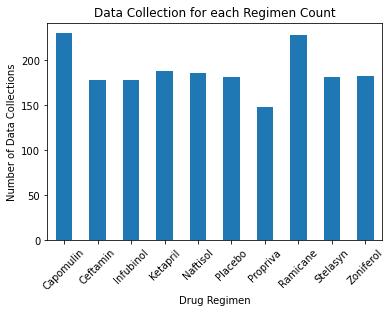

In [148]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_regimens = group_regimen["Drug Regimen"].count().plot.bar( rot = 45)
display(number_regimens)
#number_regimens = pd.DataFrame({"Num_Regimens": number_regimens})
#x_axis = (number_regimens)
#plt.bar(x_axis, rot = 45)
# Title and Axis Labels
plt.title("Data Collection for each Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Collections")


Text(0, 0.5, 'Number of Data Collections')

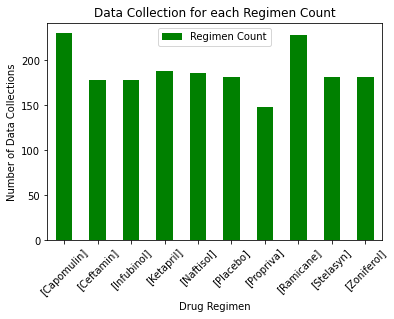

In [149]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create X and Y values and create Data Frame
x_axis = group_regimen["Drug Regimen"].unique()
y_axis = group_regimen["Drug Regimen"].count()
pyplot_df = pd.DataFrame({"Drug Regimen": x_axis, "Regimen Count": y_axis})
# Create Bar Graph from pyplot_df
ax = pyplot_df.plot.bar(x='Drug Regimen', y='Regimen Count', color = 'green', rot=45)
plt.title("Data Collection for each Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Collections")

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = pd.value_counts(clean_mice_study_df["Sex"])
display(gender_count)


Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

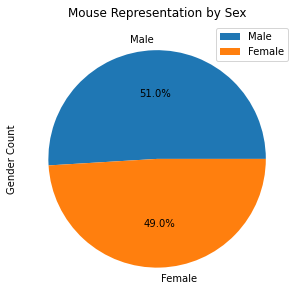

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df = pd.DataFrame({"Gender Count": gender_count})
plot = pie_df.plot.pie(y='Gender Count', figsize=(5, 5), title = "Mouse Representation by Sex",\
                       autopct="%1.1f%%", shadow=False, startangle=0)
plt.show

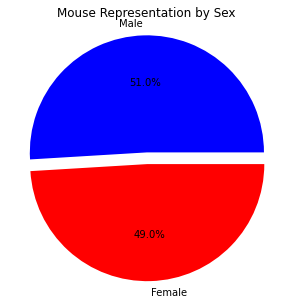

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_type = clean_mice_study_df["Sex"].unique()
sex_type
my_colors = ['blue','red',]
my_explode = (0, 0.1)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.pie(gender_count,labels=sex_type,autopct='%1.1f%%', startangle =0, shadow = False, colors=my_colors, explode=my_explode)
plt.title('Mouse Representation by Sex')
plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
group_by_mice = clean_mice_study_df.groupby("Mouse ID")
max_timepoint = group_by_mice["Timepoint"].max()
max_timepoint
#max_timepoint2 = clean_mice_study_df.sort_values('Timepoint', ascending=False).drop_duplicates(['Drug Regimen','Tumor Volume'])


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_merged = pd.merge(clean_mice_study_df, max_timepoint, on = "Mouse ID").reset_index()
max_time_cleaned = max_time_merged.drop_duplicates(\
  subset = ['Mouse ID', 'Timepoint_y'],\
  keep = 'last').reset_index(drop = True)
max_time_cleaned.rename(columns={"Timepoint_y": "Max Time"}, inplace = True)
max_time_cleaned.head(10)

capomulin_df = max_time_cleaned.loc[lambda max_time_cleaned: max_time_cleaned['Drug Regimen'] == "Capomulin"]
ramicane_df = max_time_cleaned.loc[lambda max_time_cleaned: max_time_cleaned['Drug Regimen'] == "Ramicane"]
infubinol_df = max_time_cleaned.loc[lambda max_time_cleaned: max_time_cleaned['Drug Regimen'] == "Infubinol"]
ceftamin_df = max_time_cleaned.loc[lambda max_time_cleaned: max_time_cleaned['Drug Regimen'] == "Ceftamin"]
ceftamin_df
frames_combo = [capomulin_df, ramicane_df, infubinol_df, ceftamin_df ]
drug_combo = pd.concat(frames_combo)
drug_combo.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Max Time
1,19,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,29,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,39,m601,Capomulin,Male,22,17,45,28.430964,1,45
6,64,f966,Capomulin,Male,16,17,20,30.485985,0,20
10,104,u364,Capomulin,Male,18,17,45,31.023923,3,45


In [154]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for medicine in treatments:
    tumor_volume = drug_combo.loc[drug_combo["Drug Regimen"]== medicine]["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volume)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # Determine outliers using upper and lower bounds
    quartiles=tumor_volume.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round(2)
    upperq = (quartiles[0.75]).round(2)
    median = (quartiles[0.5]).round(2)
    iqr = (upperq-lowerq).round(2)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = tumor_volume.loc[(tumor_volume > upper_bound) | (tumor_volume < lower_bound)]
    if outliers.count() != 0:
        print(f"{medicine} is potential outlier: {outliers}.") 
   

Infubinol is potential outlier: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64.


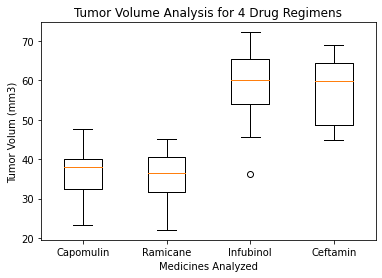

In [155]:
#tumor_vol_data
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels = treatments)
plt.title("Tumor Volume Analysis for 4 Drug Regimens")
plt.xlabel("Medicines Analyzed")
plt.ylabel("Tumor Volum (mm3)")

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

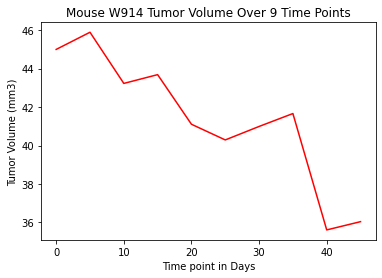

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_w914 = clean_mice_study_df.loc[clean_mice_study_df["Mouse ID"]=="w914"]
df_w914
plt.plot(df_w914['Timepoint'], df_w914['Tumor Volume (mm3)'], color = "red")
plt.title("Mouse W914 Tumor Volume Over 9 Time Points")
plt.xlabel("Time point in Days")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 0, 'Mouse Tumor Voume (mm3) Capomulin')

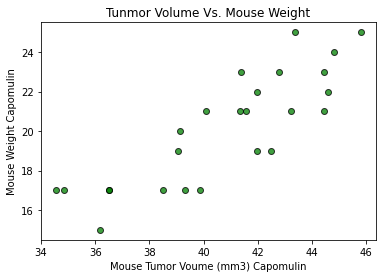

In [157]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#capomulin_sc = clean_mice_study_df.loc[clean_mice_study_df["Drug Regimen"] == "Drug Regimen"["Capomulin"]
capomulin_sc = clean_mice_study_df.loc[lambda max_time_cleaned: max_time_cleaned['Drug Regimen'] == "Capomulin"]

mouse_weight_mean = capomulin_sc.groupby("Mouse ID")["Weight (g)"].mean()
mouse_tumor_mean = capomulin_sc.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_wtv = pd.DataFrame({"Mean Tumor Volume": mouse_tumor_mean, "Mean Mouse Wight (g)": mouse_weight_mean})
capomulin_sc.head()
mouse_wtv
plt.scatter(mouse_tumor_mean, mouse_weight_mean,  facecolors="green", edgecolors="black",alpha=0.75)
plt.title("Tunmor Volume Vs. Mouse Weight")
plt.ylabel("Mouse Weight Capomulin")
plt.xlabel("Mouse Tumor Voume (mm3) Capomulin")

## Correlation and Regression

The correlation coefficient between Tumor Mean Volume and Mouse Weight Mean is 0.84


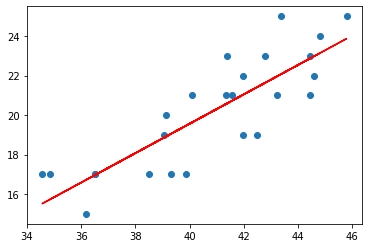

In [158]:
# Calculate the correlation coefficient and linear regression model 
print(f"The correlation coefficient between Tumor Mean Volume and Mouse Weight Mean is {round(st.pearsonr(mouse_tumor_mean,mouse_weight_mean)[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_tumor_mean = mouse_wtv.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
mouse_weight_mean = mouse_wtv.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(mouse_tumor_mean, mouse_weight_mean) #perform linear regression
Y_pred = linear_regressor.predict(mouse_tumor_mean)  # make predictions
plt.scatter(mouse_tumor_mean, mouse_weight_mean)
plt.plot(mouse_tumor_mean, Y_pred, color='red')
plt.show()